<a href="https://colab.research.google.com/github/NokCup/Books/blob/main/BreamAndSmelt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 우리가 영화 속에서 흔히 볼 수 있는 인공지능을 강인공지능(Strong AI) 이라 한다.
- 현실에서는 약인공지능이 우리가 볼 수 있는 것이다.
- 인공지능이란 학습하고 추론가능한 지능을 지닌 시스템이다. 약인공지능,  강인공지능으로 나누어진다.

- 머신러닝은 규칙을 프로그래밍하지 않아도 자동으로 데이터에서 규칙을 학습하는 알고리즘이다.

- 딥러닝은 인공 신경망이라고도 불리우며 텐서플로, 파이토치가 대표적인 라이브러리다.

머신러닝의 한 예시로 생선 분류 문제가 있다.
문제 : 도미, 곤들매기, 농어, 강꼬치고기, 로치, 빙어, 송어 등 다양한 생선이 있다. 컴퓨터는 이 생선들 중 도미가 어떤 생선인지 판단해야한다.

- 도미가 어떤 생선이 판단하기 위해 생선의 특징을 파악할 수 있다
<br>
 도미의 특징은 길이가 30cm 를 넘는다는 것. 하지만 모든 도미가 30cm를 넘진 않으므로 새우와 고래 만큼의 현격한 차이가 있지 않으면 오차가 생길 수 밖에 없다.


In [ ]:
#생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
#생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

위 코드에서 길이는 x, 무게는 y라고 두었을 때 (x, y) 를 좌표계에 표현해보자.
- x, y 축으로 이루어진 좌표계에서 x,y의 관계를 표현하는 방법을 산점도 라고 한다.

Text(0, 0.5, 'weight')

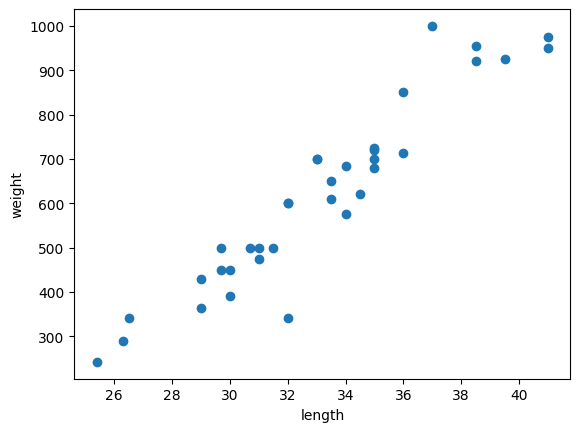

In [ ]:
import matplotlib.pyplot as plt  # '맷플롯립' 모듈을 불러와서 산점도를 그리는 scatter() 함수를 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')      # (x축은 길이) 를 화면에 표시
plt.ylabel('weight')      # (y축은 무게) 를 화면에 표시



위 산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 선형적이라고 말한다.
<br><br>
이번엔 빙어의 데이터도 넣어보자

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

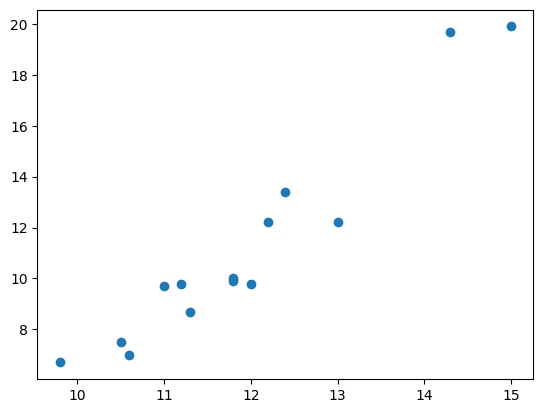

In [ ]:
plt.scatter(smelt_length, smelt_weight)

bream 생선과 smelt 생선의 관계를 합쳐보자

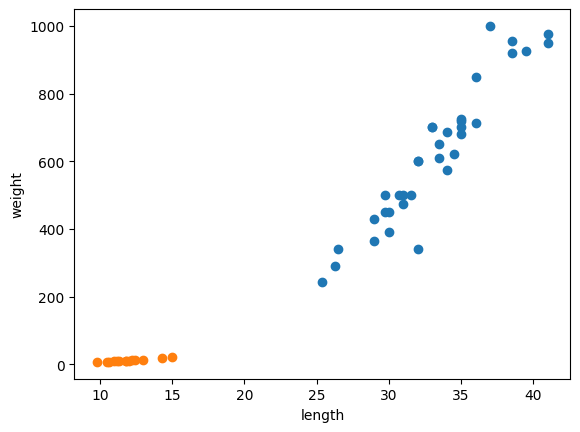

In [ ]:
import matplotlib.pyplot as plt  # '맷플롯립' 모듈을 불러와서 산점도를 그리는 scatter() 함수를 사용

plt.scatter(bream_length, bream_weight)  #도미
plt.scatter(smelt_length, smelt_weight)  #빙어
plt.xlabel('length')      # (x축은 길이) 를 화면에 표시
plt.ylabel('weight')      # (y축은 무게) 를 화면에 표시
plt.show()


위 산점도 그래프를 보면 빙어의 길이가 늘어나도 도미에 비하면 무게에 영향을 크게 받지 않는다는 것을 알 수 있다.
<br>
<br>

이제 두 데이터 구분을 위해 머신러닝 프로그램을 만들기 전 도미의 리스트와 빙어의 리스트를 합치자.

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

사이킷런 패키지를 사용하려면 2차원 리스트를 만들어야 한다.

ex) 49개의 생선 - [[25.4, 242.0]
                   [26.3, 290.0]
                      .
                      .
                      .
                   [15.0, 19.9]]
                   (길이  / 무게)

-> zip() , 리스트내포를 이용한다

In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


이후 정답 데이터를 만든다. 시스템이 도미와 빙어를 구분하기 위해서는 최소한 무엇이 도미이고 빙어인지는 알고 있어야 한다.
- 도미 = 1 이라 두고 빙어 = 0 이라 두자.


In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier      #K-최근접 이웃 알고리즘을 구현한 클래스 KNeiborsClassifier를 임포트한다.

kn = KNeighborsClassifier()
kn49 = KNeighborsClassifier(n_neighbors=49)     #만일 k-최근접 이웃 모델이 49개의 데이터를 사용한다면 생선 45개 중 도미가 35개 즉, 다수를 차지하므로 어떤 데이터를 넣든 도미로 예측됟다

In [ ]:
#kn에 fish_data, fish_target 두 객체를 전달해서 학습시킨다.

In [ ]:
kn.fit(fish_data, fish_target)    # fit() 매서드는 주어진 데이터로 알고리즘을 훈련한다.
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

객체(모델) 'kn' 이 얼마날 잘 훈련됬는지 평가하기 위해 score() 를 사용한다.
- score() 는 사이킷런에서 모델을 평가하는 메서드다.
- score() 는 '0' 과 '1' 사이의 값을 반환한다. 1에 가까울 수록 데이터를 정확히 맞혔다는 것을 의미한다.


In [ ]:
kn.score(fish_data, fish_target)      # 정확도 가 1.0이 나온다. 즉 정확도가 100%라는 의미
kn49.score(fish_data, fish_target)

kn49.predict([[10, 8]])               # 생선 49개 중 도미가 35, 빙어 14 이므로
kn.predict([[10, 8]])

array([0])

- K-최근접 이웃 (K-Nearest Neighbors) 알고리즘
<br>
: 새로운 데이터를 주변에서 가장 가까운(직선거리) K개의 데이터를 보고 예측하는 것이다.
<br>
가장 간단한 머신러닝 알고리즘 중 하나다. 규칙을 찾기 보다는 전체 데이터를 메모리에 가지고 있는 것이 전부다.

In [ ]:
for n in range(5, 50):
  #k-nn 이웃 개수 설정
  kn.n_neighbors = n
  #점수 계산
  score = kn.score(fish_data, fish_target)

  if score < 1:
    print(n, "일 때", score)



18 일 때 0.9795918367346939
19 일 때 0.9795918367346939
20 일 때 0.9795918367346939
21 일 때 0.9795918367346939
22 일 때 0.9795918367346939
23 일 때 0.9795918367346939
24 일 때 0.9795918367346939
25 일 때 0.9795918367346939
26 일 때 0.9795918367346939
27 일 때 0.9795918367346939
28 일 때 0.9591836734693877
29 일 때 0.7142857142857143
30 일 때 0.7142857142857143
31 일 때 0.7142857142857143
32 일 때 0.7142857142857143
33 일 때 0.7142857142857143
34 일 때 0.7142857142857143
35 일 때 0.7142857142857143
36 일 때 0.7142857142857143
37 일 때 0.7142857142857143
38 일 때 0.7142857142857143
39 일 때 0.7142857142857143
40 일 때 0.7142857142857143
41 일 때 0.7142857142857143
42 일 때 0.7142857142857143
43 일 때 0.7142857142857143
44 일 때 0.7142857142857143
45 일 때 0.7142857142857143
46 일 때 0.7142857142857143
47 일 때 0.7142857142857143
48 일 때 0.7142857142857143
49 일 때 0.7142857142857143
